In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/HeartDiseasePrediction/Heart_disease_cleveland_new.csv'
df = pd.read_csv(file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [8]:
print(f"\n Dataset Shape: {df.shape}")


 Dataset Shape: (303, 14)


In [9]:
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [11]:
print("\n Descriptive Statistics:")
display(df.describe())



 Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [12]:
print("\n Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


 Unique Values in Each Column:
age: 41
sex: 2
cp: 4
trestbps: 50
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 4
thal: 3
target: 2


In [13]:
target_col = 'target' if 'target' in df.columns else 'condition'
print(f"\n🔹 Target Distribution ({target_col}):")
print(df[target_col].value_counts())


🔹 Target Distribution (target):
target
0    164
1    139
Name: count, dtype: int64


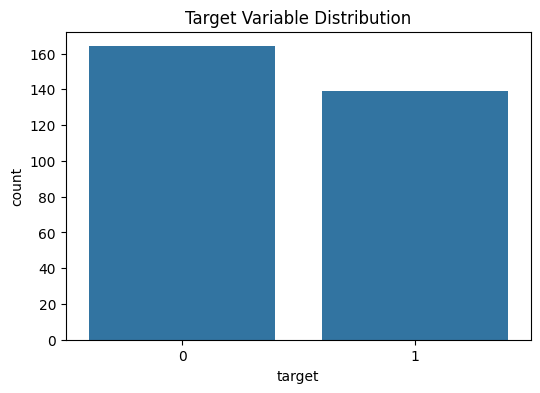

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col)
plt.title('Target Variable Distribution')
plt.show()

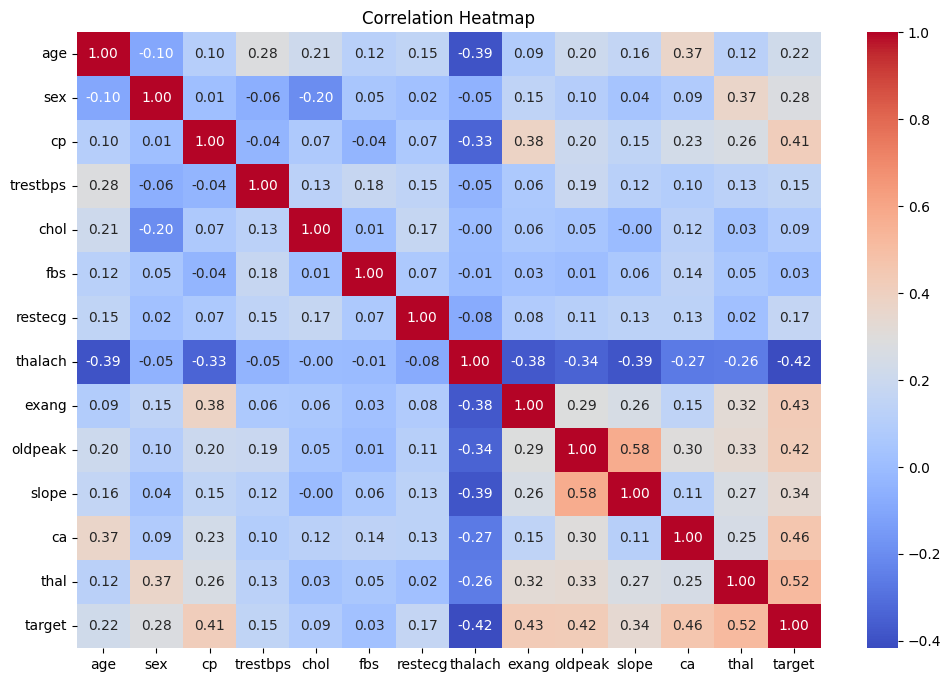

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


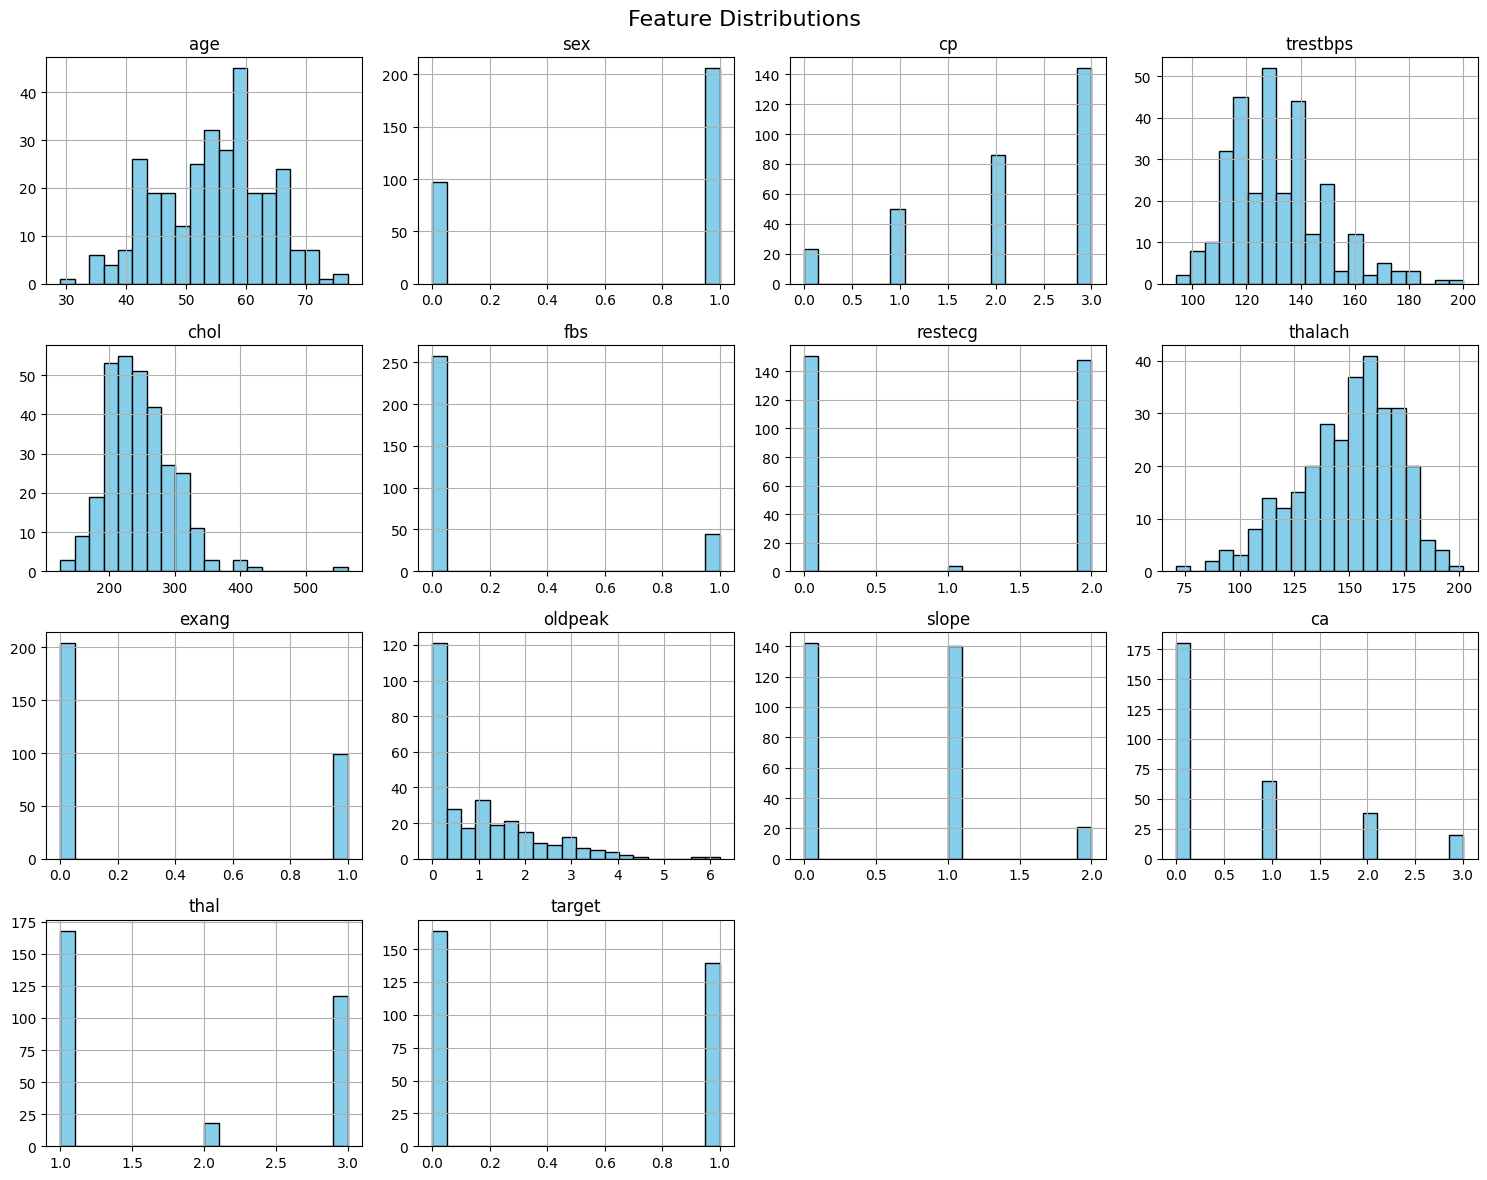

In [16]:
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

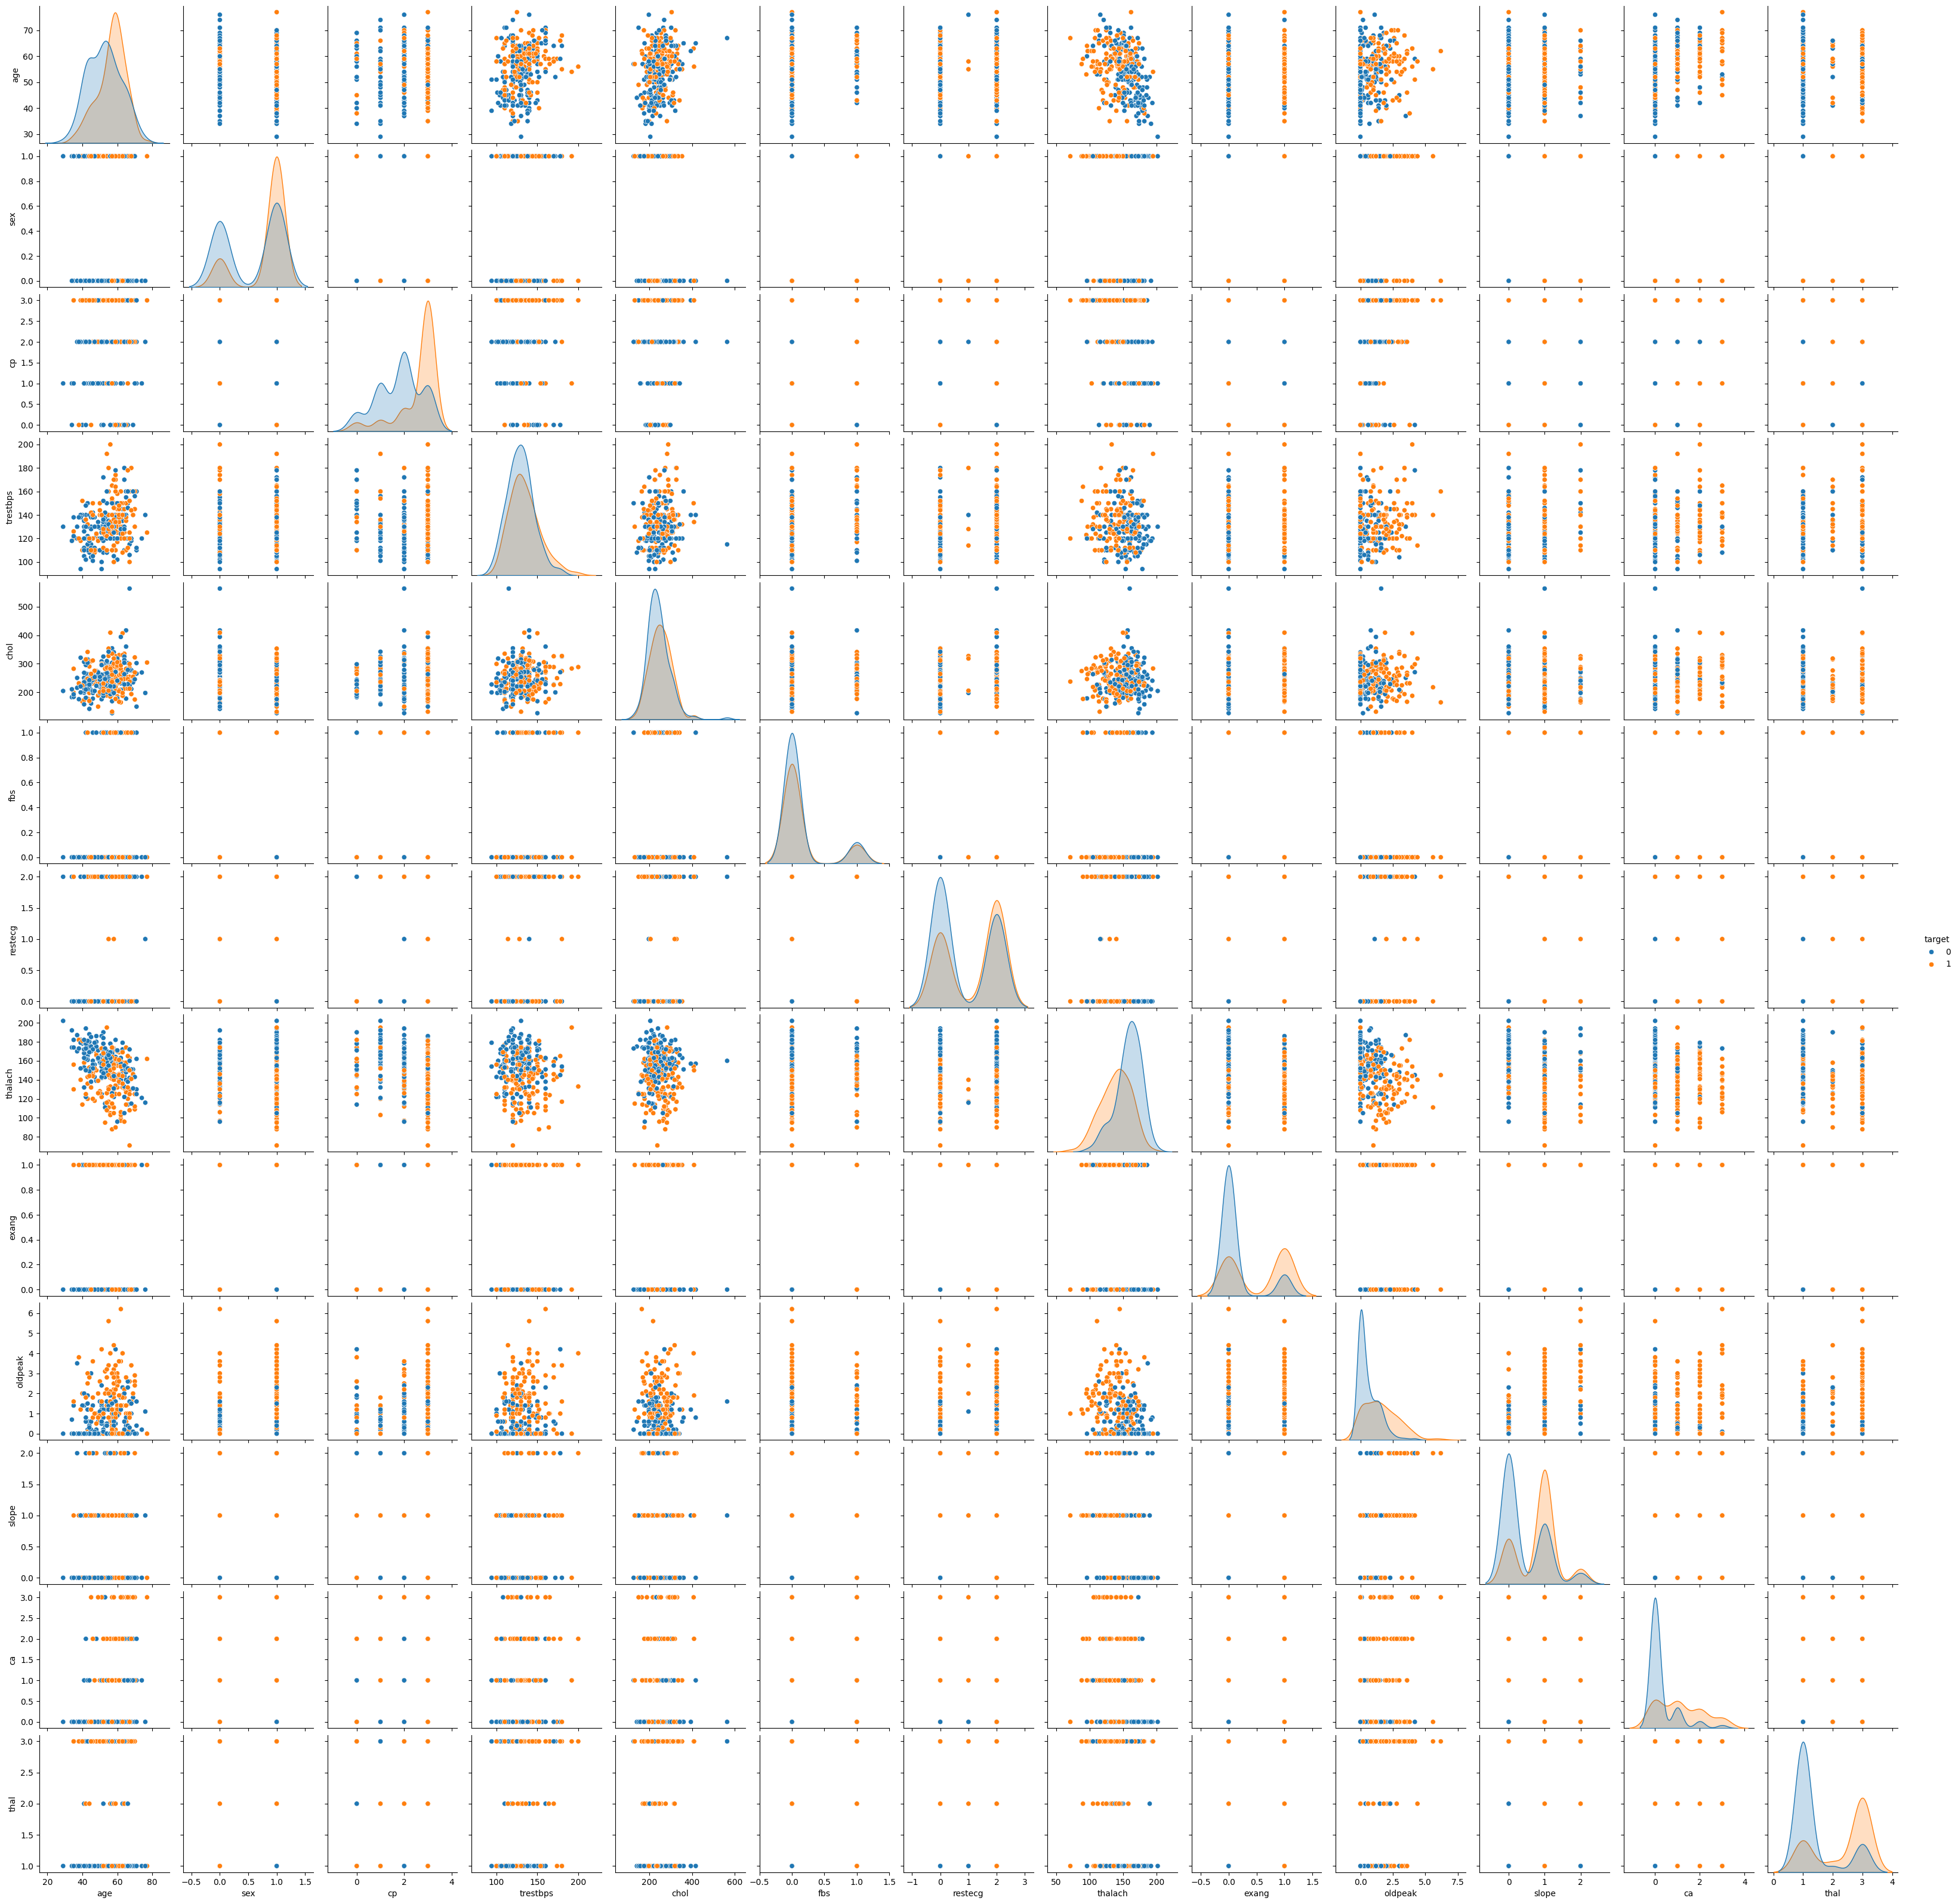

In [17]:
sns.pairplot(df, hue=target_col)
plt.show()

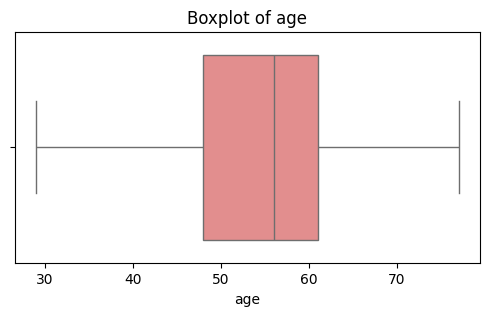

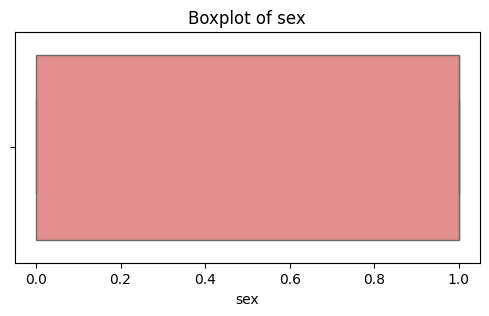

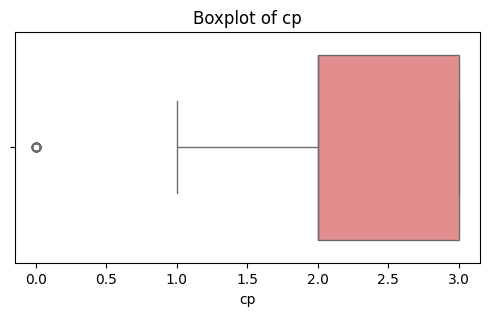

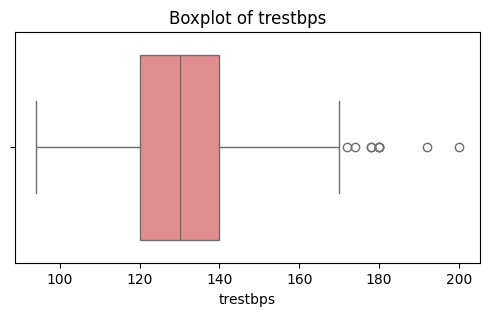

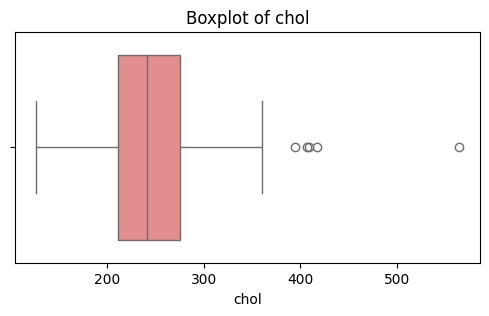

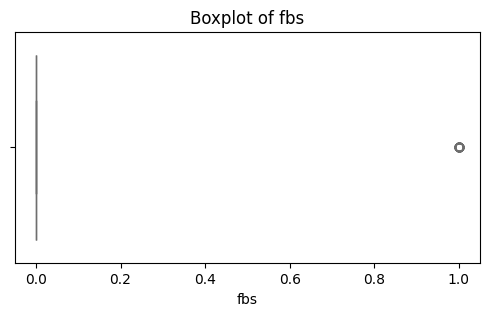

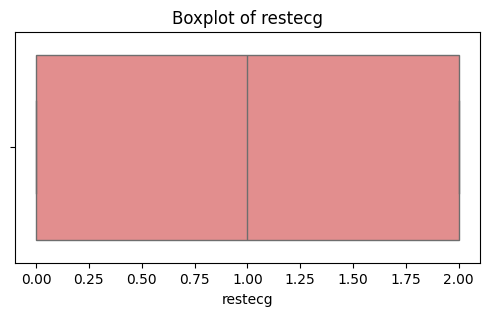

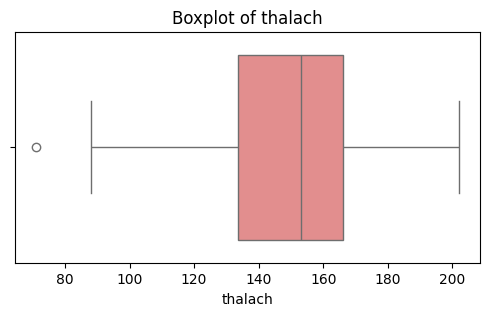

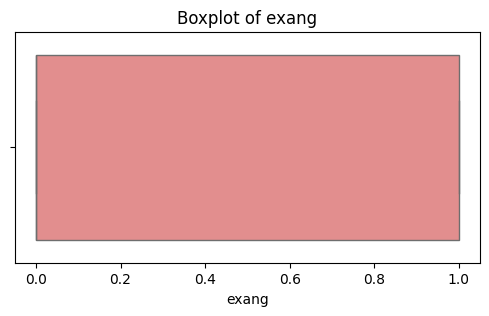

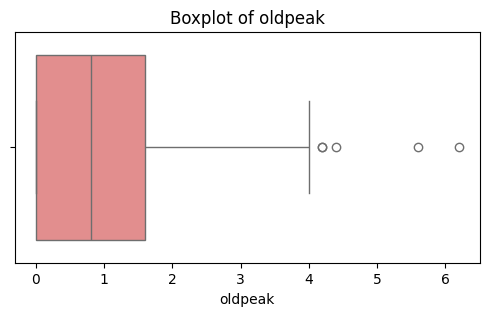

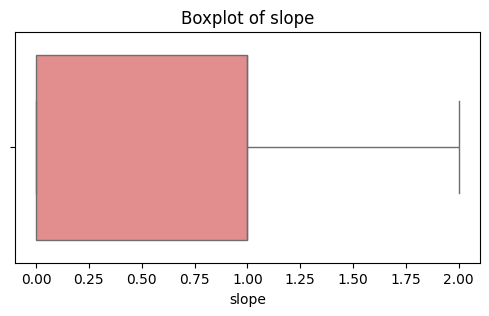

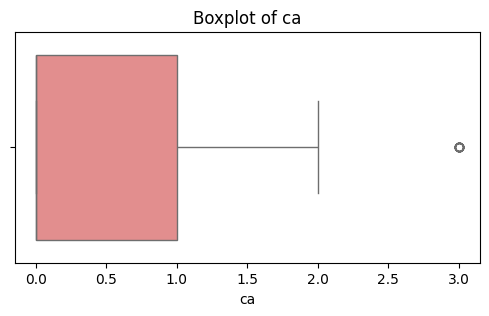

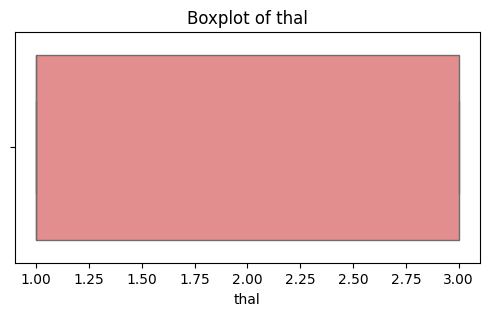

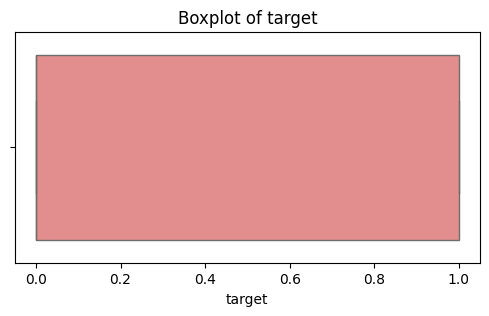

In [18]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [19]:
df['target'].value_counts(normalize=True)

,proportion
target,
0,0.541254
1,0.458746


In [20]:
!pip install xgboost


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import xgboost as xgb

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
X = df.drop(target_col, axis=1)
y = df[target_col]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(
    eval_metric='logloss',         # set evaluation metric
    random_state=42,               # reproducibility
    n_estimators=100,              # number of trees
    learning_rate=0.1,             # step size
    max_depth=3                    # tree depth
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
y_pred = model.predict(X_test)
print("Predicted Class Labels:\n", y_pred)

Predicted Class Labels:
 [0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0]


In [32]:
y_proba = model.predict_proba(X_test)
print("Predicted Probabilities:\n", y_proba[:5])

Predicted Probabilities:
 [[0.68405294 0.31594703]
 [0.33397657 0.66602343]
 [0.05273825 0.94726175]
 [0.6151229  0.3848771 ]
 [0.09568661 0.9043134 ]]


In [35]:
positive_probs = y_proba[:, 1]
print("Predicted Positive Probabilities:\n", positive_probs[:5])

Predicted Positive Probabilities:
 [0.31594703 0.66602343 0.94726175 0.3848771  0.9043134 ]


In [41]:
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = recall_score(y_test, y_pred, pos_label=1)
print(f"\n Sensitivity (True Positive Rate): {sensitivity:.2f}")
specificity = tn / (tn + fp)
print(f" Specificity (True Negative Rate): {specificity:.2f}")
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.2f}")

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


 Sensitivity (True Positive Rate): 0.84
 Specificity (True Negative Rate): 0.86
 Accuracy: 0.85


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", accuracy)

 Accuracy: 0.8524590163934426


In [43]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print(" ROC AUC Score:", roc_auc)

 ROC AUC Score: 0.8529094827586207


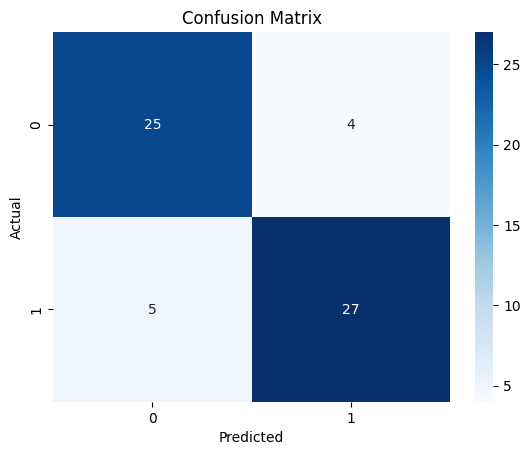

In [44]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

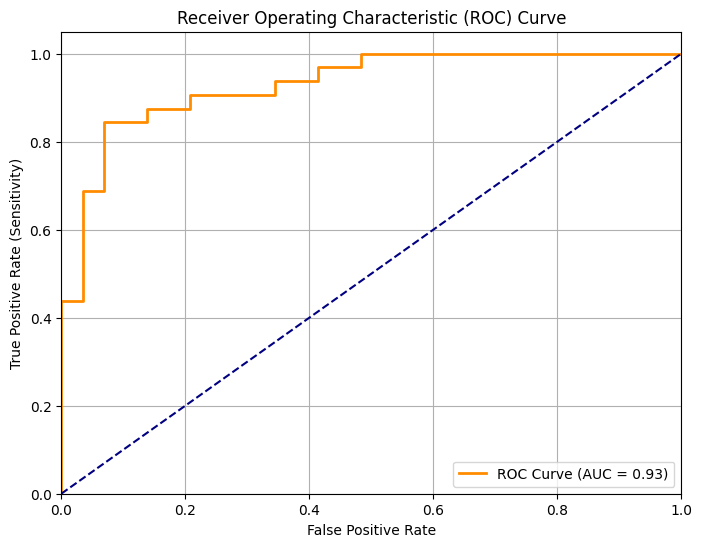

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [47]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_mlp = df.drop('target', axis=1)
y_mlp = df['target']

# Train-test split
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_mlp, y_mlp, test_size=0.2, random_state=42)

# Scaling
scaler_mlp = StandardScaler()
X_train_mlp = scaler_mlp.fit_transform(X_train_mlp)
X_test_mlp = scaler_mlp.transform(X_test_mlp)

In [73]:
mlp_model = Sequential([
    Dense(128, input_shape=(X_train_mlp.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
mlp_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [75]:
from tensorflow.keras.callbacks import EarlyStopping

mlp_early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [76]:
mlp_history = mlp_model.fit(
    X_train_mlp, y_train_mlp,
    validation_data=(X_test_mlp, y_test_mlp),
    epochs=100,
    batch_size=16,
    callbacks=[mlp_early_stop],
    verbose=1
)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6452 - loss: 0.6642 - val_accuracy: 0.7869 - val_loss: 0.5974
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6889 - loss: 0.5498 - val_accuracy: 0.8852 - val_loss: 0.5438
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8379 - loss: 0.4075 - val_accuracy: 0.8689 - val_loss: 0.5117
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7471 - loss: 0.5365 - val_accuracy: 0.8689 - val_loss: 0.4887
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7678 - loss: 0.4962 - val_accuracy: 0.8689 - val_loss: 0.4591
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7981 - loss: 0.4180 - val_accuracy: 0.8689 - val_loss: 0.4254
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8196 - loss: 0.4123 - val_accuracy: 0.8689 - val_loss: 0.4075
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8776 - loss: 0.3460 - val_accuracy: 0.8689

In [77]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, recall_score

y_pred_prob_mlp = mlp_model.predict(X_test_mlp).ravel()
y_pred_mlp = (y_pred_prob_mlp >= 0.5).astype(int)

accuracy_mlp = accuracy_score(y_test_mlp, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test_mlp, y_pred_prob_mlp)

print(f" Accuracy: {accuracy_mlp:.2f}")
print(f" ROC AUC: {roc_auc_mlp:.2f}")
print(" Classification Report:\n", classification_report(y_test_mlp, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test_mlp, y_pred_mlp)
tn, fp, fn, tp = cm_mlp.ravel()
sensitivity = recall_score(y_test_mlp, y_pred_mlp)
specificity = tn / (tn + fp)

print(f" Sensitivity: {sensitivity:.2f}")
print(f" Specificity: {specificity:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
 Accuracy: 0.87
 ROC AUC: 0.94
 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

 Sensitivity: 0.88
 Specificity: 0.86


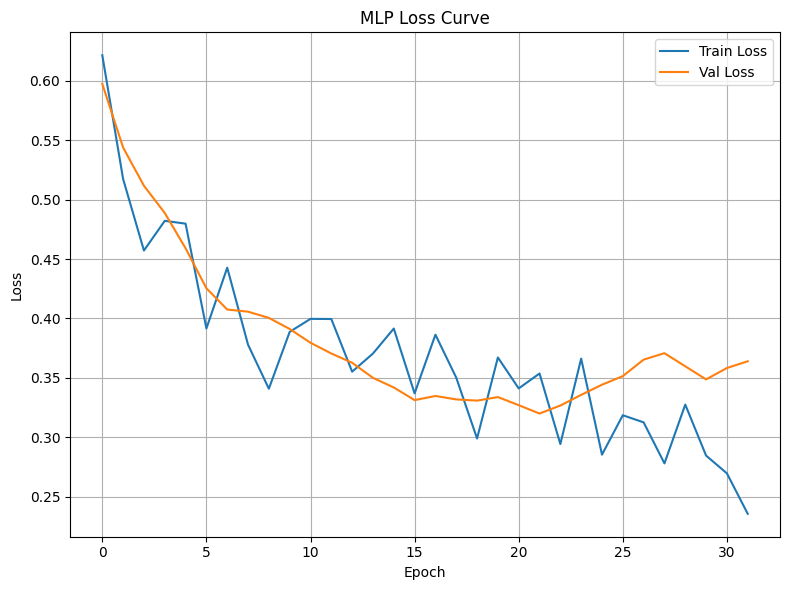

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Val Loss')
plt.title('MLP Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


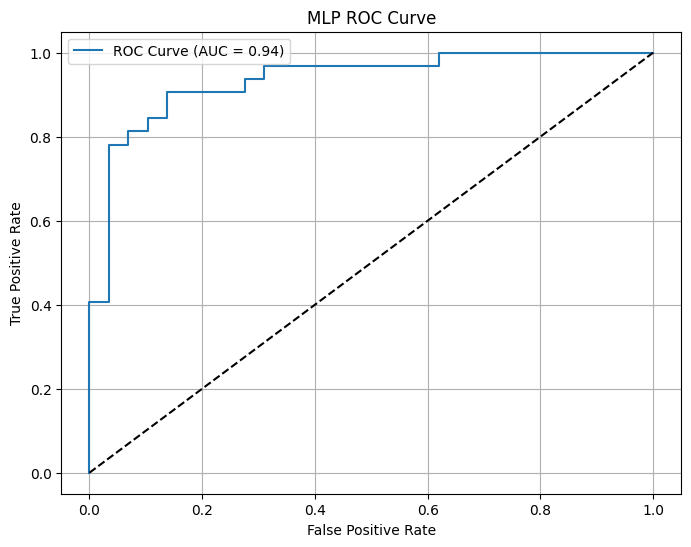

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_mlp, y_pred_prob_mlp)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
mlp_model.save('mlp_heart_disease_model.h5')


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

mlp_model_full = Sequential([
    Dense(128, input_shape=(X_train_mlp.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

mlp_model_full.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
mlp_history_full = mlp_model_full.fit(
    X_train_mlp, y_train_mlp,
    validation_data=(X_test_mlp, y_test_mlp),
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5205 - loss: 0.8323 - val_accuracy: 0.7705 - val_loss: 0.6130
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7066 - loss: 0.5855 - val_accuracy: 0.8197 - val_loss: 0.5589
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7443 - loss: 0.5206 - val_accuracy: 0.7705 - val_loss: 0.5231
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8096 - loss: 0.4534 - val_accuracy: 0.7869 - val_loss: 0.5008
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7885 - loss: 0.4347 - val_accuracy: 0.7869 - val_loss: 0.4814
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8033 - loss: 0.4385 - val_accuracy: 0.7705 - val_loss: 0.4710
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8047 - loss: 0.4171 - val_accuracy: 0.7869 - val_loss: 0.4522
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8975 - loss: 0.3016 - val_accuracy: 0.8197

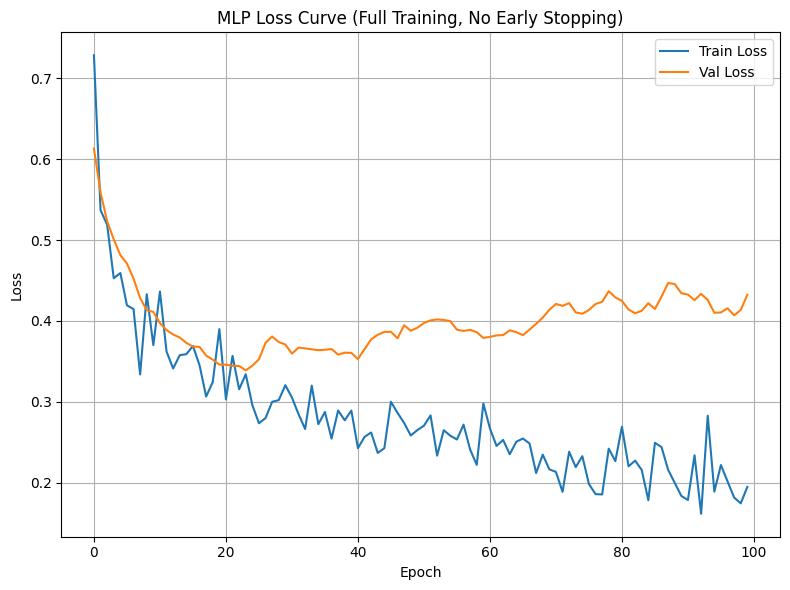

In [85]:

plt.figure(figsize=(8, 6))
plt.plot(mlp_history_full.history['loss'], label='Train Loss')
plt.plot(mlp_history_full.history['val_loss'], label='Val Loss')
plt.title('MLP Loss Curve (Full Training, No Early Stopping)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [86]:
y_proba_full = mlp_model_full.predict(X_test_mlp).ravel()
y_pred_full = (y_proba_full >= 0.5).astype(int)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 402ms/step


In [87]:
from sklearn.metrics import accuracy_score

accuracy_full = accuracy_score(y_test_mlp, y_pred_full)
print(f" Accuracy (No Early Stop): {accuracy_full:.2f}")


 Accuracy (No Early Stop): 0.80


 Confusion Matrix:
[[22  7]
 [ 5 27]]


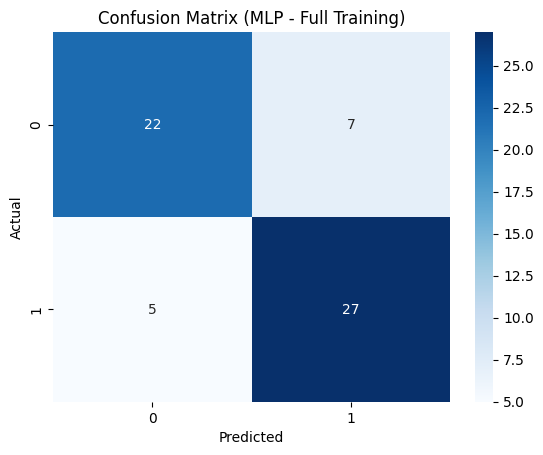

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_full = confusion_matrix(y_test_mlp, y_pred_full)
tn, fp, fn, tp = cm_full.ravel()

print(" Confusion Matrix:")
print(cm_full)

# Visualize
sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (MLP - Full Training)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


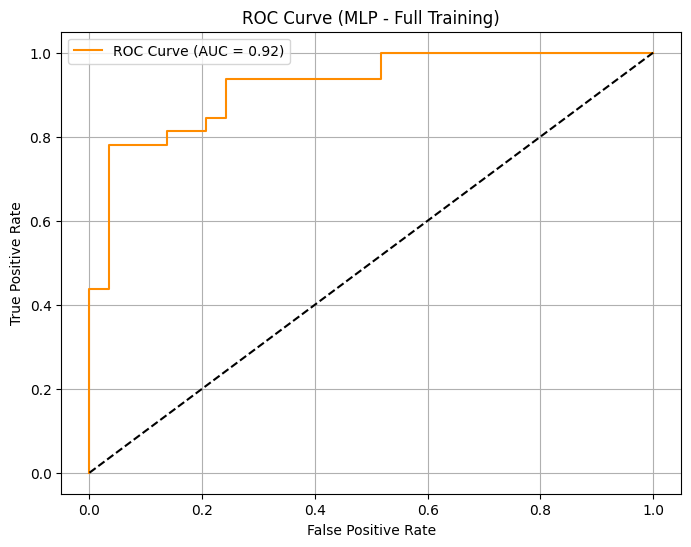

 ROC AUC Score (No Early Stop): 0.92


In [92]:

fpr, tpr, _ = roc_curve(y_test_mlp, y_proba_full)
auc_full = roc_auc_score(y_test_mlp, y_proba_full)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_full:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (MLP - Full Training)')
plt.legend()
plt.grid(True)
plt.show()

print(f" ROC AUC Score (No Early Stop): {auc_full:.2f}")


In [94]:

print("Classification Report (MLP - Full Training):")
print(classification_report(y_test_mlp, y_pred_full))
sensitivity_full = recall_score(y_test_mlp, y_pred_full)
specificity_full = tn / (tn + fp)

print(f"Sensitivity (Recall for Class 1): {sensitivity_full:.2f}")
print(f"Specificity (True Negative Rate): {specificity_full:.2f}")

Classification Report (MLP - Full Training):
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Sensitivity (Recall for Class 1): 0.84
Specificity (True Negative Rate): 0.76


In [95]:
# EARLY STOP MODEL
y_proba_early = mlp_model.predict(X_test_mlp).ravel()
y_pred_early = (y_proba_early >= 0.5).astype(int)

# FULL MODEL
y_proba_full = mlp_model_full.predict(X_test_mlp).ravel()
y_pred_full = (y_proba_full >= 0.5).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [96]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_metrics(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)  # Sensitivity
    f1 = f1_score(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    return {
        'Accuracy': round(accuracy, 2),
        'ROC AUC': round(auc, 2),
        'Sensitivity': round(recall, 2),
        'Specificity': round(specificity, 2),
        'Precision': round(precision, 2),
        'F1 Score': round(f1, 2)
    }


In [97]:
metrics_early = evaluate_metrics(y_test_mlp, y_pred_early, y_proba_early)
metrics_full = evaluate_metrics(y_test_mlp, y_pred_full, y_proba_full)


In [100]:

comparison_df = pd.DataFrame({
    'With Early Stopping': metrics_early,
    'Without Early Stopping': metrics_full
})

print("Model Evaluation Comparison:")
display(comparison_df)


Model Evaluation Comparison:


,With Early Stopping,Without Early Stopping
Accuracy,0.87,0.80
ROC AUC,0.94,0.92
Sensitivity,0.88,0.84
Specificity,0.86,0.76
Precision,0.88,0.79
F1 Score,0.88,0.82


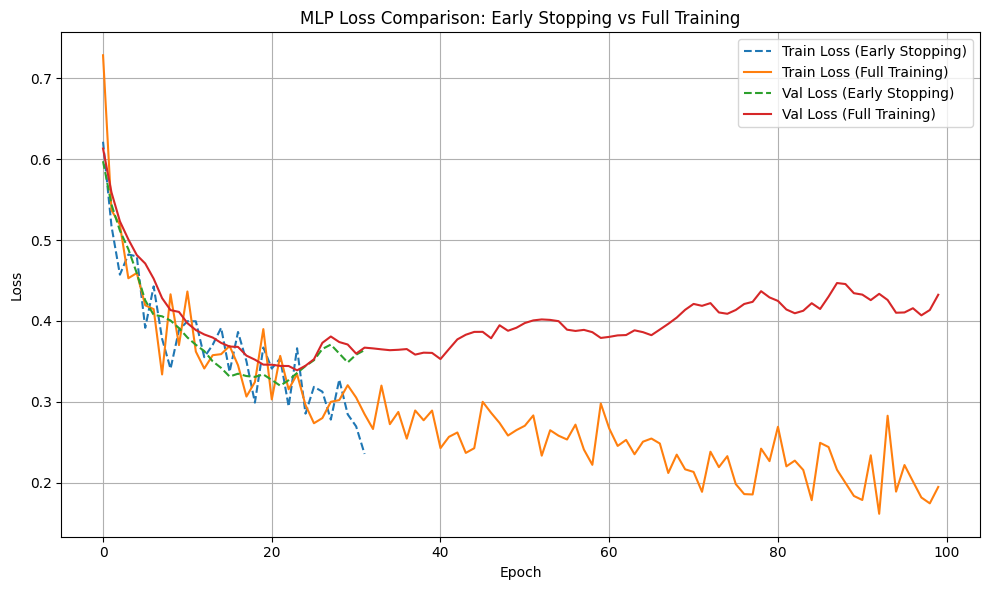

In [103]:
plt.figure(figsize=(10, 6))

# Training Loss
plt.plot(mlp_history.history['loss'], label='Train Loss (Early Stopping)', linestyle='--')
plt.plot(mlp_history_full.history['loss'], label='Train Loss (Full Training)')

# Validation Loss
plt.plot(mlp_history.history['val_loss'], label='Val Loss (Early Stopping)', linestyle='--')
plt.plot(mlp_history_full.history['val_loss'], label='Val Loss (Full Training)')

plt.title('MLP Loss Comparison: Early Stopping vs Full Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Multilayer Perceptron (MLP) Training & Evaluation Pipeline

1. Model Initialization (MLP Architecture Design)
We created a fully connected neural network (MLP) tailored for binary classification:

Input Layer: Matches the number of features (after preprocessing).

Hidden Layers: 3 layers with 128, 64, and 32 neurons, each followed by:

ReLU activation for non-linearity.

BatchNormalization for stabilizing training.

Dropout to prevent overfitting.

Output Layer: 1 neuron with sigmoid activation to output probability of heart disease.

This architecture balances complexity and regularization for small-to-medium tabular datasets like Heart Disease.

2. Model Compilation
We compiled the model using:

Optimizer: Adam — adaptive learning rate optimization.

Loss Function: binary_crossentropy — ideal for binary classification.

Metric: accuracy — to track classification correctness.

3. Training the Model
We trained the model in two settings:

A. With Early Stopping (mlp_history)
Used EarlyStopping callback:

Monitored validation loss

Patience of 10 epochs

Restored best weights

Training stopped early (after ~25–30 epochs) to avoid overfitting.

B. Without Early Stopping (mlp_history_full)
Trained fully for 100 epochs regardless of validation loss.

Allowed us to observe possible overfitting.

4. Model Evaluation
We evaluated both models using the same test set and the following metrics:

Accuracy: Overall correctness.

ROC AUC: Probability that the model ranks a random positive higher than a random negative.

Confusion Matrix: TP, FP, TN, FN counts.

Sensitivity (Recall): TP rate — how well the model detects actual positives.

Specificity: TN rate — how well it avoids false positives.

Precision: How many predicted positives were actually positive.

F1 Score: Balance between precision and recall.

5. Visualization and Comparison
A. Loss Curve Comparison
The provided plot shows:

Train Loss (Early Stop) — dropped rapidly, then plateaued.

Val Loss (Early Stop) — stayed low and stable.

Train Loss (Full) — continued to improve.

Val Loss (Full) — decreased initially, then rose again, indicating overfitting.

Insight: Early stopping prevented the model from overfitting beyond ~30 epochs, maintaining generalization.
6. Metric Comparison Table
We created a table comparing key metrics across both models.


EarlyStopping is a Keras callback that monitors a specific metric (usually validation loss), and stops training when that metric stops improving for a certain number of epochs — called patience

monitor='val_loss': it watched your validation loss.

patience=10: if validation loss didn’t improve for 10 consecutive epochs, it stopped training.

restore_best_weights=True: it rolled back to the best model weights seen during training.

Why Did It Stop at 32 Epochs?
It means:

The best validation loss was seen at epoch 22

Then the model kept training, but val loss didn't improve

After 10 more epochs (up to epoch 32), patience ran out

So training stopped automatically at epoch 32

And it restored the model weights from epoch 22



In [104]:
# Find indexes of 0 and 1 in y_test_mlp
idx_0 = np.where(y_test_mlp == 0)[0][0]  # First index where label is 0
idx_1 = np.where(y_test_mlp == 1)[0][0]  # First index where label is 1


In [105]:
# Get the actual feature vectors
sample_0 = X_test_mlp[idx_0].reshape(1, -1)
sample_1 = X_test_mlp[idx_1].reshape(1, -1)


In [106]:
# Predict probabilities
pred_0_prob = mlp_model.predict(sample_0).ravel()[0]
pred_1_prob = mlp_model.predict(sample_1).ravel()[0]

# Apply threshold to get final class
pred_0_class = int(pred_0_prob >= 0.5)
pred_1_class = int(pred_1_prob >= 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [107]:
print(f"Instance with true label = 0")
print(f"Predicted Probability: {pred_0_prob:.2f}")
print(f"Predicted Class: {pred_0_class}")

print(f"\nInstance with true label = 1")
print(f"Predicted Probability: {pred_1_prob:.2f}")
print(f"Predicted Class: {pred_1_class}")


Instance with true label = 0
Predicted Probability: 0.72
Predicted Class: 1

Instance with true label = 1
Predicted Probability: 0.68
Predicted Class: 1


In [108]:
y_test_mlp.value_counts()

,count
target,
1,32
0,29


In [111]:

# Reconstruct the original feature set
sample_0_raw = pd.DataFrame([X_test_mlp[idx_0]], columns=X_mlp.columns)
print(sample_0_raw)


        age       sex        cp  trestbps      chol       fbs   restecg  \
0 -0.198627  0.722504 -0.092057 -0.125982  0.007893  2.516611  1.012492   

    thalach     exang   oldpeak     slope        ca      thal  
0  1.021242 -0.715891 -0.873573 -0.963432  2.637167 -0.849232  


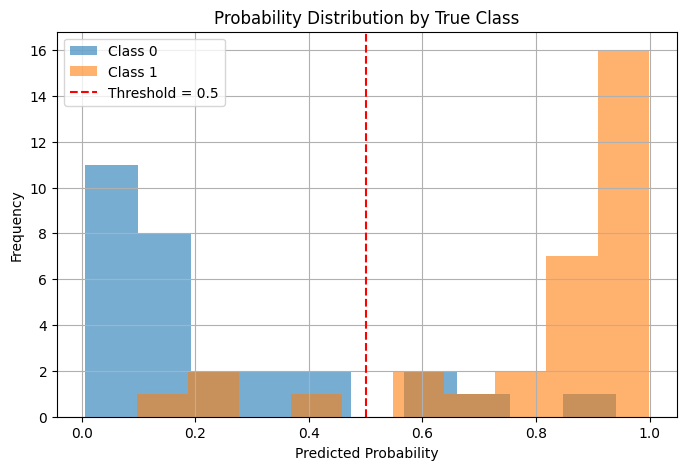

In [113]:

plt.figure(figsize=(8,5))
plt.hist(y_proba_early[y_test_mlp==0], bins=10, alpha=0.6, label='Class 0')
plt.hist(y_proba_early[y_test_mlp==1], bins=10, alpha=0.6, label='Class 1')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution by True Class')
plt.legend()
plt.grid(True)
plt.show()


In [114]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_mlp, y_proba_early)

# Example: Choose threshold where precision > 0.90
for p, r, t in zip(precisions, recalls, thresholds):
    if p > 0.9:
        print(f"Threshold: {t:.2f}, Precision: {p:.2f}, Recall: {r:.2f}")
        break


Threshold: 0.68, Precision: 0.93, Recall: 0.81


In [118]:
# Apply new threshold of 0.68
new_threshold = 0.68
y_pred_adjusted = (y_proba_early >= new_threshold).astype(int)


In [120]:
from sklearn.metrics import classification_report, confusion_matrix

print(" Classification Report (Threshold = 0.68):")
print(classification_report(y_test_mlp, y_pred_adjusted))

print("Confusion Matrix:")
print(confusion_matrix(y_test_mlp, y_pred_adjusted))


 Classification Report (Threshold = 0.68):
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Confusion Matrix:
[[27  2]
 [ 7 25]]


In [123]:
# View the predictions (first 20 for example)
print("Predicted Classes (Threshold = 0.68):")
print(y_pred_adjusted[:20])


Predicted Classes (Threshold = 0.68):
[1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0]


In [125]:
import pandas as pd

# Compare predictions and true labels side by side
comparison_df = pd.DataFrame({
    'True Label': y_test_mlp.values,
    'Predicted (0.68)': y_pred_adjusted
})

# Show a preview of the comparison
print("\n Sample Prediction Comparison:")
print(comparison_df.head(15))



 Sample Prediction Comparison:
    True Label  Predicted (0.68)
0            0                 1
1            1                 0
2            1                 1
3            1                 0
4            1                 1
5            1                 1
6            1                 1
7            1                 1
8            1                 0
9            0                 0
10           0                 0
11           0                 0
12           1                 1
13           1                 1
14           1                 1


In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(" Classification Report (Threshold = 0.68):")
print(classification_report(y_test_mlp, y_pred_adjusted))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_mlp, y_pred_adjusted))

print(" Accuracy:", accuracy_score(y_test_mlp, y_pred_adjusted))


 Classification Report (Threshold = 0.68):
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

 Confusion Matrix:
[[27  2]
 [ 7 25]]
 Accuracy: 0.8524590163934426


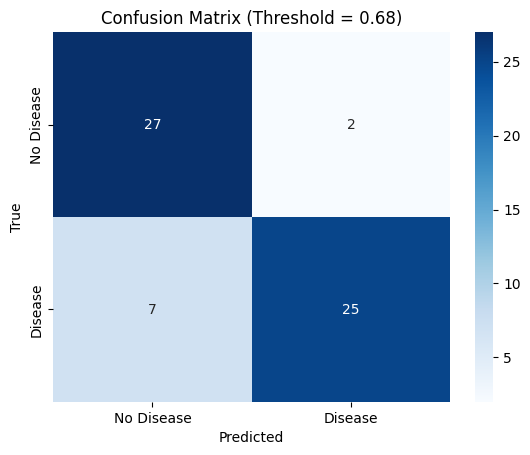

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_mlp, y_pred_adjusted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Threshold = 0.68)")
plt.show()


In [131]:
# Apply threshold to predicted probabilities
new_threshold = 0.68
y_pred_final = (y_proba_early >= new_threshold).astype(int)

# Show all predictions
print("Final Predicted Class Labels:")
print(y_pred_final)

# Combine with actual labels
final_results = pd.DataFrame({
    'True Label': y_test_mlp.values,
    'Predicted Class': y_pred_final
})

# Show first 20 predictions
print("\n Final Prediction Comparison (First 20):")
print(final_results.head(20))


Final Predicted Class Labels:
[1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0]

 Final Prediction Comparison (First 20):
    True Label  Predicted Class
0            0                1
1            1                0
2            1                1
3            1                0
4            1                1
5            1                1
6            1                1
7            1                1
8            1                0
9            0                0
10           0                0
11           0                0
12           1                1
13           1                1
14           1                1
15           0                0
16           0                0
17           1                1
18           1                1
19           0                0


In [132]:
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test_mlp, y_pred_final)

# Unpack values
tn, fp, fn, tp = cm.ravel()

# Print results
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 25
False Positives (FP): 2
True Negatives (TN): 27
False Negatives (FN): 7


In [157]:
#Take 5 random samples
sample_df = X_mlp.copy()
sample_df['target'] = y_mlp
sample_5 = sample_df.sample(n=5, random_state=42)

X_sample = sample_5.drop('target', axis=1)
y_sample_true = sample_5['target'].values

#Predict using mlp_model
y_sample_proba = mlp_model.predict(X_sample)
threshold = 0.68
y_sample_pred = (y_sample_proba >= threshold).astype(int)

#Display Results
results = pd.DataFrame({
    'Predicted Probability': y_sample_proba.flatten().round(2),
    'Predicted Class': y_sample_pred.flatten(),
    'True Label': y_sample_true
})

print("Prediction Results on 5 Random Samples:")
print(results)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction Results on 5 Random Samples:
   Predicted Probability  Predicted Class  True Label
0                    1.0                1           0
1                    1.0                1           1
2                    1.0                1           1
3                    1.0                1           1
4                    1.0                1           1


In [158]:
print("Final Accuracy:", accuracy_score(y_test_mlp, (mlp_model.predict(X_test_mlp) >= 0.5).astype(int)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Final Accuracy: 0.8688524590163934


In [159]:
print("Final Accuracy (threshold=0.68):", accuracy_score(y_test_mlp, (mlp_model.predict(X_test_mlp) >= 0.68).astype(int)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Final Accuracy (threshold=0.68): 0.8524590163934426


In [160]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

# Predicted probabilities
y_pred_proba = mlp_model.predict(X_test_mlp)

# Apply custom threshold
threshold = 0.68
y_pred_class = (y_pred_proba >= threshold).astype(int)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [162]:
# Confusion matrix
cm = confusion_matrix(y_test_mlp, y_pred_class)
tn, fp, fn, tp = cm.ravel()

# Metrics
sensitivity = tp / (tp + fn)  # Recall for class 1
specificity = tn / (tn + fp)  # Recall for class 0

print("🔹 Confusion Matrix:")
print(cm)
print(f"Sensitivity (Recall for class 1): {sensitivity:.2f}")
print(f"Specificity (Recall for class 0): {specificity:.2f}")


🔹 Confusion Matrix:
[[27  2]
 [ 7 25]]
Sensitivity (Recall for class 1): 0.78
Specificity (Recall for class 0): 0.93


🔷 ROC AUC Score: 0.94


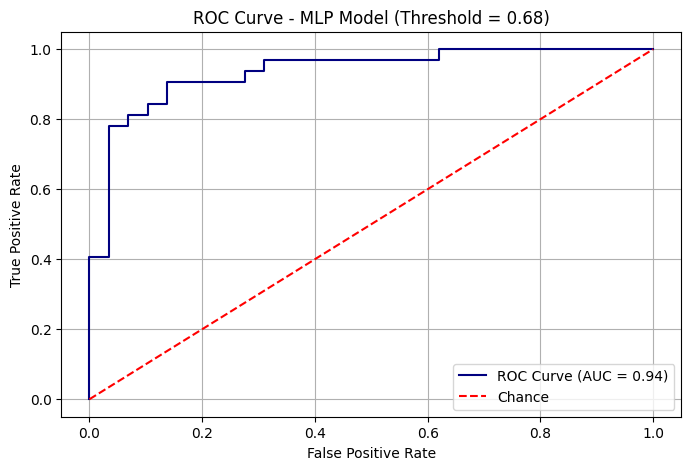

In [163]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test_mlp, y_pred_proba)
print(f"🔷 ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_mlp, y_pred_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], 'r--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - MLP Model (Threshold = 0.68)")
plt.legend()
plt.grid()
plt.show()


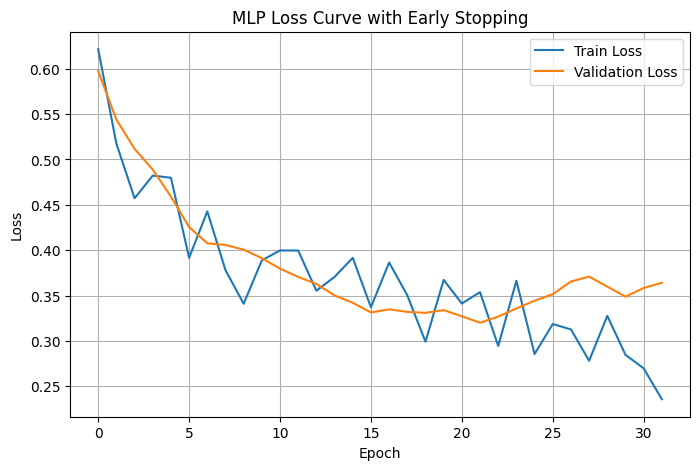

In [164]:
plt.figure(figsize=(8, 5))
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MLP Loss Curve with Early Stopping")
plt.legend()
plt.grid()
plt.show()


In [165]:
print("\nClassification Report:")
print(classification_report(y_test_mlp, y_pred_class))



Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [168]:
mlp_model.save("mlp_early_stop_model.keras")

to reload later

from keras.models import load_model

mlp_model_loaded = load_model("mlp_early_stop_model.keras")  # or .h5

In [169]:
import joblib

# Save the trained model
joblib.dump(model, "xgboost_model.pkl")

['xgboost_model.pkl']

to reload later


model_loaded = joblib.load("xgboost_model.pkl")


predictions = model_loaded.predict(X_test)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [171]:
# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

# Fit models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [177]:
sklearn_models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "SVM": svm,
    "XGBoost": model  # This is your trained XGBClassifier
}



In [180]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [181]:
sklearn_models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "SVM": svm,
    "XGBoost": xgb_model  # ✅ Now it's the correct XGBoost model
}


In [182]:
metrics = []

for name, m in sklearn_models.items():
    y_pred_proba = m.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= 0.5).astype(int)

    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba)
    })


In [184]:
# Evaluate Keras MLP model with threshold 0.68
mlp_pred_proba = mlp_model.predict(X_test_mlp).flatten()
mlp_pred = (mlp_pred_proba >= 0.68).astype(int)

metrics.append({
    "Model": "MLP (Early Stop)",
    "Accuracy": accuracy_score(y_test_mlp, mlp_pred),
    "Precision": precision_score(y_test_mlp, mlp_pred),
    "Recall": recall_score(y_test_mlp, mlp_pred),
    "F1-Score": f1_score(y_test_mlp, mlp_pred),
    "ROC AUC": roc_auc_score(y_test_mlp, mlp_pred_proba)
})


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [185]:
results_df = pd.DataFrame(metrics)
print(results_df.sort_values(by="ROC AUC", ascending=False).round(3))


                 Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
2                  SVM     0.885      0.903   0.875     0.889    0.941
4     MLP (Early Stop)     0.852      0.926   0.781     0.847    0.935
1        Random Forest     0.869      0.900   0.844     0.871    0.932
3              XGBoost     0.852      0.871   0.844     0.857    0.931
0  Logistic Regression     0.885      0.879   0.906     0.892    0.921


/tmp/ipython-input-190-2466967525.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


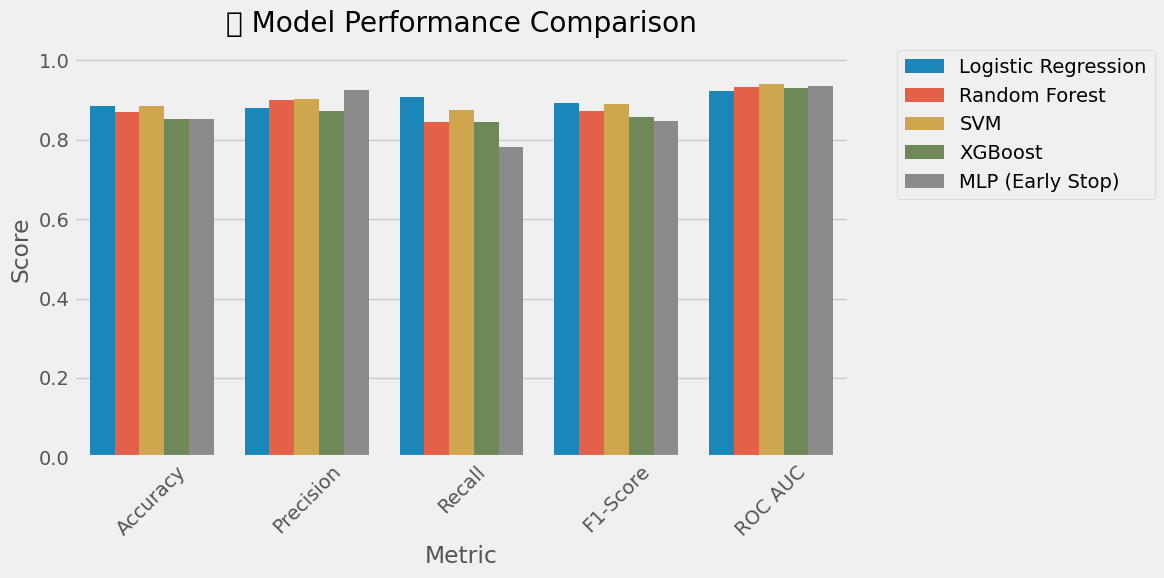

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid Matplotlib style
plt.style.use("fivethirtyeight")  # Or try "ggplot", "classic", etc.

plt.figure(figsize=(12, 6))

# Melt the results DataFrame to long format for grouped plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create grouped bar plot
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")

plt.title("🔍 Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [194]:
# Random sample indices
sample_indices = np.random.choice(len(X_test), size=10, replace=False)

# Select samples
X_sample = X_test[sample_indices]
y_sample_true = y_test.iloc[sample_indices]  # ✅ use .iloc here
X_sample_mlp = X_test_mlp[sample_indices]


In [195]:
# Predict with sklearn models
model_preds = {}

for name, m in sklearn_models.items():
    y_pred = m.predict(X_sample)
    model_preds[name] = y_pred

In [197]:
# Align the same sample rows in MLP test set
X_sample_mlp = X_test_mlp[sample_indices]  # Use NumPy indexing
mlp_preds = (mlp_model.predict(X_sample_mlp).flatten() >= 0.68).astype(int)
model_preds["MLP (Early Stop)"] = mlp_preds


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [200]:
# Convert dictionary to DataFrame
comparison_df = pd.DataFrame(model_preds)
comparison_df["True Label"] = y_sample_true.values

# Move True Label to first column
cols = comparison_df.columns.tolist()
cols.insert(0, cols.pop(cols.index("True Label")))
comparison_df = comparison_df[cols]

print("\n Prediction Comparison for 10 Random Test Samples:")
print(comparison_df)



 Prediction Comparison for 10 Random Test Samples:
   True Label  Logistic Regression  Random Forest  SVM  XGBoost  \
0           1                    1              1    1        1   
1           0                    1              1    1        1   
2           1                    1              1    1        1   
3           0                    0              0    0        0   
4           0                    0              0    0        0   
5           1                    1              1    1        1   
6           1                    1              1    1        1   
7           1                    1              1    1        1   
8           0                    0              0    0        0   
9           0                    0              0    0        0   

   MLP (Early Stop)  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0  
5                 1  
6                 1  
7                 1  
8           

In [203]:
# Drop previous ✓ columns to avoid duplicates
comparison_df = comparison_df[[col for col in comparison_df.columns if "✓" not in col]]

# Calculate match for each model
for model in comparison_df.columns[1:]:
    comparison_df[f"{model} ✓"] = (comparison_df[model] == comparison_df["True Label"]).astype(int)

# Sum correct predictions per model
score_summary = comparison_df[[col for col in comparison_df.columns if "✓" in col]].sum().sort_values(ascending=False)

print("\n Correct Predictions Per Model:")
print(score_summary)




 Correct Predictions Per Model:
Logistic Regression ✓    9
Random Forest ✓          9
SVM ✓                    9
XGBoost ✓                9
MLP (Early Stop) ✓       9
dtype: int64


/tmp/ipython-input-203-496953142.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_df[f"{model} ✓"] = (comparison_df[model] == comparison_df["True Label"]).astype(int)


🔍 Key Insights:
✅ Best F1 Score → Logistic Regression (0.892)
Most balanced model overall.

Highest Recall (0.906) — catches the most true heart disease cases.

Slightly lower Precision than MLP/SVM, but that’s okay in medical context (better to catch more cases).

✅ Best ROC AUC → SVM (0.941)
Best at distinguishing between positive and negative classes.

Slightly lower recall than Logistic Regression (0.875 vs. 0.906).

Still very strong performer overall.

⚠️ MLP: Highest Precision (0.926), but lowest Recall (0.781)
MLP is very cautious — rarely gives a false alarm.

But it misses a lot of actual positive cases → high FN, bad for health scenarios.

⚖️ XGBoost and Random Forest
Strong, balanced models.

Slightly behind top 2 in both recall and F1.

Good if you need tree-based interpretability or feature importance.

🏆 Final Ranking (Based on Medical Relevance):
Rank	Model	Reason
🥇	Logistic Regression	Highest Recall + F1 Score. Safest in medical settings (low FN).
🥈	SVM	Best ROC AUC, close performance. Good tradeoff.
🥉	Random Forest	Strong balance + interpretability via tree structure.
4️⃣	XGBoost	Solid, slightly behind RF. Also interpretable and robust.
5️⃣	MLP (Early Stop)	Too many missed positives (low recall) despite best precision.